In [3]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 660.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 919.0 kB/s eta 0:00:13
   ---------------------------------------- 0.1/11.6 MB 819.2 kB/s eta 0:00:15
    --------------------------------------- 0.2/11.6 MB 893.0 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.6 MB 831.5 kB/s eta 0:00:14
    --------------------------------------- 0.3/11.6 MB 874.6 kB/s eta 0:00:13
   - -------------------------------------- 0.3/11.6 MB 905.4 kB/s eta 0:00:13
   - -------------------------------------- 0.3/11.6 MB 873.8 kB/s eta 0:00:13
   - -------------------------------------- 0.4/11.6 MB 897.8 kB/s eta 0:00:13
   - -------------------------------------- 0.4/11.6 MB 949.4 kB/s eta 0:00:12
   - -------------------------------------- 0.5/11.6 MB 962.6 kB/s eta 0:00:12
   - -------------------------------------- 0.5/11.6 MB 929.3

In [1]:
import pandas as pd

# import sqlite3

# # Connect to the SQLite database
# conn = sqlite3.connect('database.db')

# # Read data from the "property" table
# query = "SELECT * FROM property"
# data = pd.read_sql_query(query, conn)


# # Print the contents of the data
# print(data)
data = pd.read_csv('data/results/cleaned_data.csv')
# Close the database connection
# conn.close()

In [5]:
import matplotlib.pyplot as plt

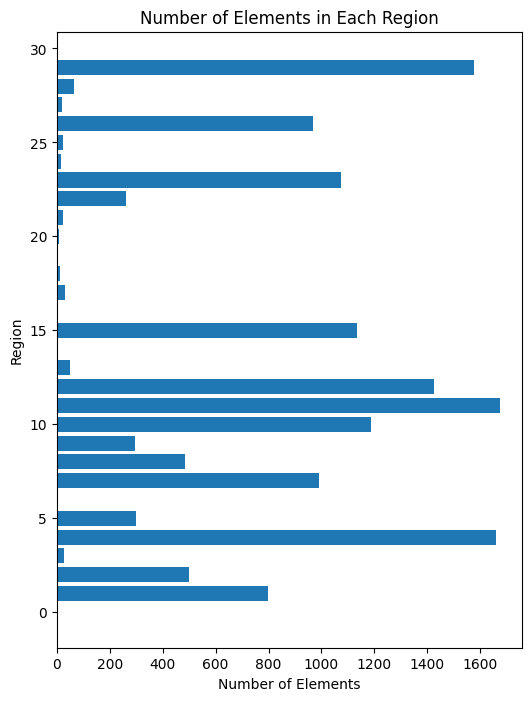

In [6]:
# Count the number of elements in each region
region_counts = data['district'].value_counts()
plt.figure(figsize=(6, 8))

# Plot the bar chart
plt.barh(region_counts.index, region_counts.values)
plt.xlabel('Number of Elements')
plt.ylabel('Region')
plt.title('Number of Elements in Each Region')
plt.show()

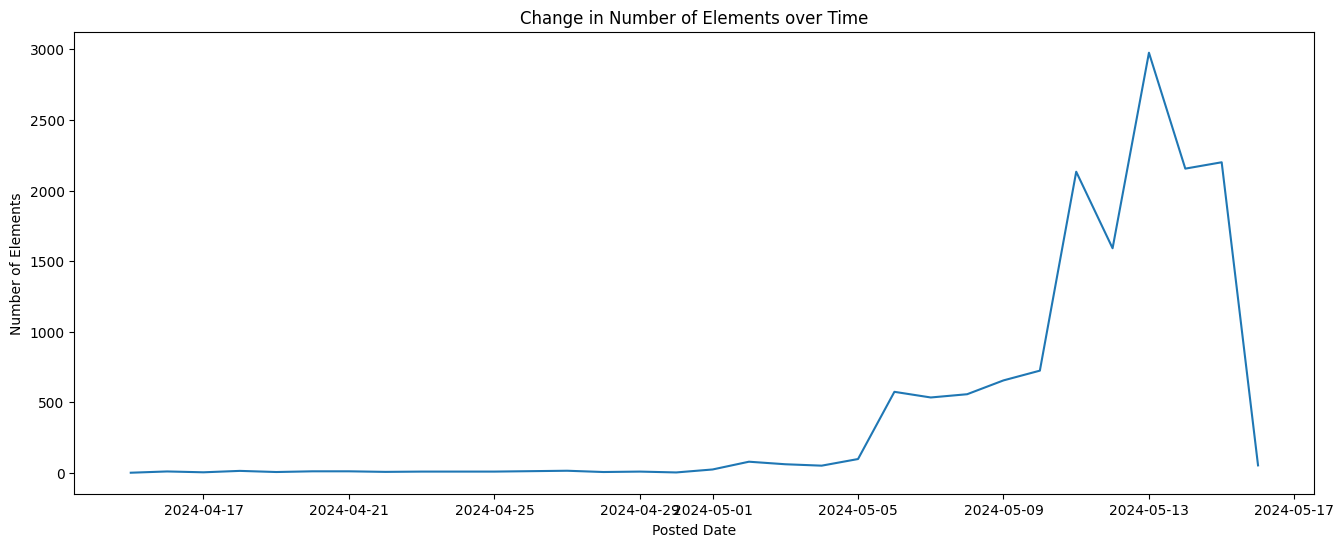

In [7]:
# Convert the posted_date column to datetime
data['posted_date'] = pd.to_datetime(data['posted_date'])

# Group the data by posted_date and count the number of elements
elements_by_date = data.groupby('posted_date').size()
plt.figure(figsize=(16, 6))

# Plot the line chart
plt.plot(elements_by_date.index, elements_by_date.values)
plt.xlabel('Posted Date')
plt.ylabel('Number of Elements')
plt.title('Change in Number of Elements over Time')
plt.show()

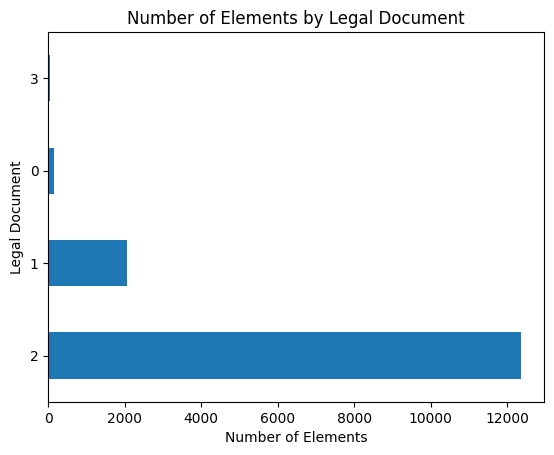

In [8]:
data['legal_document'].value_counts().plot(kind='barh')
plt.xlabel('Number of Elements')
plt.ylabel('Legal Document')
plt.title('Number of Elements by Legal Document')
plt.show()

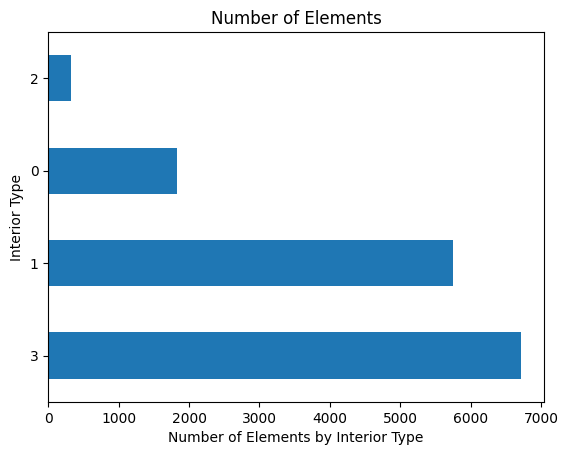

In [9]:
data['interior'].value_counts().plot(kind='barh')
plt.xlabel('Number of Elements by Interior Type')
plt.ylabel('Interior Type')
plt.title('Number of Elements')
plt.show()

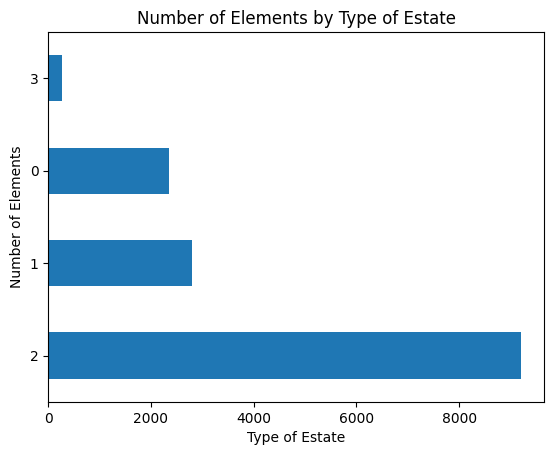

In [10]:
data['type_estate'].value_counts().plot(kind='barh')
plt.xlabel('Type of Estate')
plt.ylabel('Number of Elements')
plt.title('Number of Elements by Type of Estate')
plt.show()

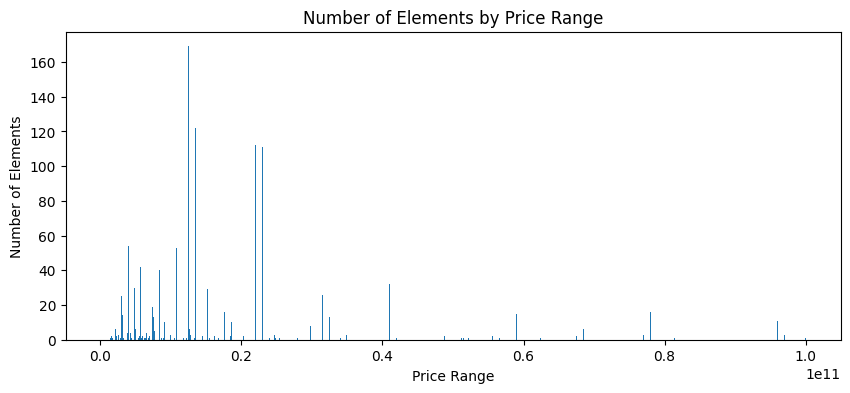

In [11]:
import matplotlib.pyplot as plt
filtered_data = data[data['price'] < 100000000000] # to make drawing easier to see
# Define the number of bins
num_bins = 10000
plt.figure(figsize=(10, 4))
# Plot the histogram
plt.hist(filtered_data['price'], bins=num_bins)
plt.xlabel('Price Range')
plt.ylabel('Number of Elements')
plt.title('Number of Elements by Price Range')
plt.show()

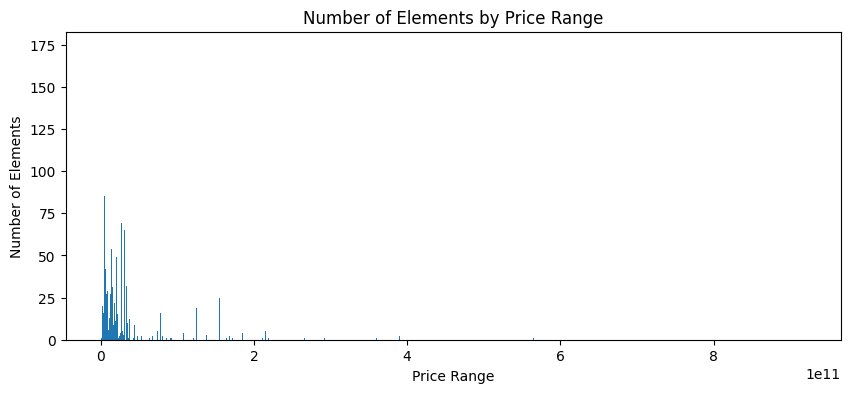

In [12]:
import matplotlib.pyplot as plt
# Define the number of bins
num_bins = 10000
plt.figure(figsize=(10, 4))
# Plot the histogram
plt.hist(data['price'], bins=num_bins)
plt.xlabel('Price Range')
plt.ylabel('Number of Elements')
plt.title('Number of Elements by Price Range')
plt.show()

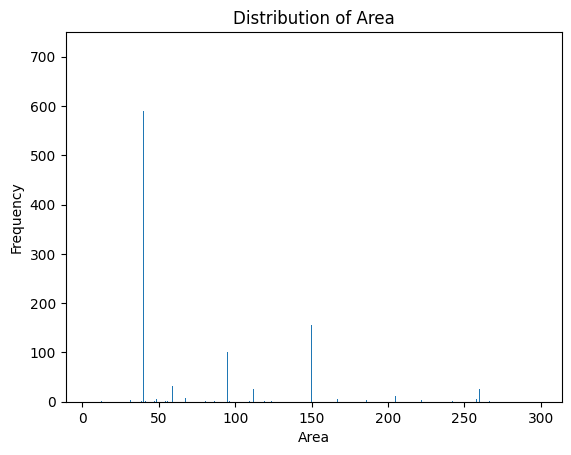

In [13]:
import matplotlib.pyplot as plt
new_data = data[data['area'] < 300] # to make drawing easier to see
# Define the number of bins
num_bins = 10000

# Plot the histogram
plt.hist(new_data['area'], bins=num_bins)

# Set the labels and title
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of Area')

# Show the plot
plt.show()

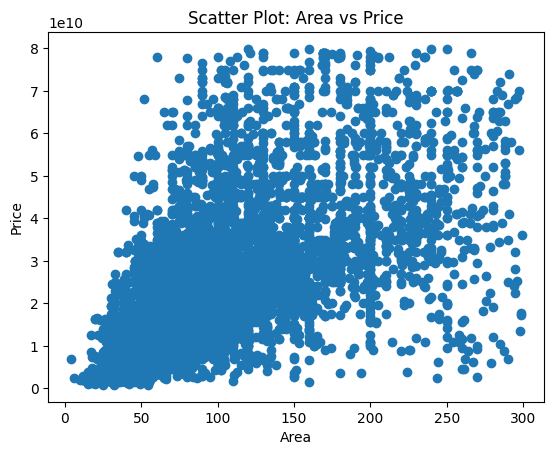

In [14]:
import matplotlib.pyplot as plt
new_data = data[data['area'] < 300] # to make drawing easier to see
new1_data = new_data[new_data['price'] < 80000000000] # to make drawing easier to see
plt.scatter(new1_data['area'], new1_data['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot: Area vs Price')
plt.show()

In [15]:
pip install seaborn

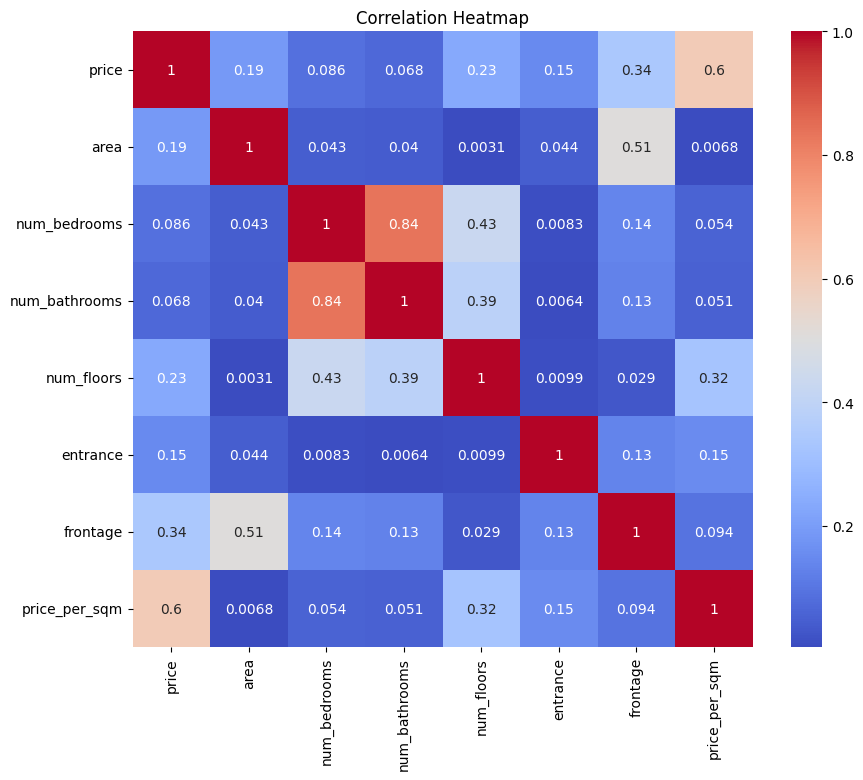

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
columns = ['price','area', 'num_bedrooms', 'num_bathrooms', 'num_floors', 'entrance', 'frontage', 'price_per_sqm']

# Calculate the correlation matrix
correlation_matrix = data[columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()